<span style="color:red">
Disclaimer: Do not share this Python notebook to third parties <br>
Atencao: Nao compartilhe esse Python notebook com outras pessoas </span>
<h1><b>Networks in socio-economic systems </b></h1>
<h3>Prof Luis E C Rocha - luis.rocha@ugent.be</h3>
<h4>Dept of Economics and Dept of Physics and Astronomy</h4>
<h4>Ghent University, Belgium</h4>
<h4><b>Version:</b> Federal University of Uberlandia, Brazil - November 2023 </h4>

<h1><b>Lab 6: Community detection</b></h1>

<h3>Summary:</h3> The goal is to study the community structure of networks using the Louvain method of community detection.

<h2><b>(0:00-1:15h) Part 1 </b></h2>


<h3><b>1.</b>Network community detection</h3>

There are (literally) hundreds of algorithms for community detection analysis. Those algorithms use different methods, models, and computational techniques for this clustering task. Despite this ecosystem of algorithms, in practice, the two most important and used algorithms are the Louvain method and Infomap method. In both cases, there are Python modules with the relevant methods to use them.

<h3><b>2.</b> Louvain method</h3>

The Louvain method (developed at the UniversitÃ© de Louvain-la-Neuve, here in Belgium!) is computationally efficient and can handle very large networks. The lab will be based on this method. For more information on the algorithm, go to https://python-louvain.readthedocs.io/en/latest/.

<ul>
    <li> First install the module "python-louvain" on your computer</li>
    <ul>
        <li> You can install via Anaconda Navigator Environments </li>
        <li> or use: pip install python-louvain           -> command line for Mac</li>
        <li> or use: python -m pip install python-louvain -> command line for Windows</li>
    </ul>
</ul>


<h4><b>2.1</b> Measures of network community</h4>


In [6]:
import networkx as nx
import community as lc
import pandas as pd

# Create a simple network
G = nx.erdos_renyi_graph(100, 0.001)#, seed=1)

# Calculate the best partition and stores as a dictionary - similar to measures done in the past, e.g. betweenness or pagerank
partition = lc.best_partition(G)


In [7]:
# show the best community partition, in which a commmunity is associate to a specific node (takes some 5-10sec in my laptop)

print( partition )


{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15, 16: 16, 17: 17, 18: 18, 19: 19, 20: 20, 21: 21, 22: 22, 23: 23, 24: 24, 25: 25, 26: 26, 27: 27, 28: 28, 29: 29, 30: 30, 31: 31, 32: 32, 33: 33, 34: 10, 35: 35, 36: 36, 37: 31, 38: 38, 39: 39, 40: 40, 41: 41, 42: 42, 43: 43, 44: 44, 45: 45, 46: 52, 47: 47, 48: 48, 49: 49, 50: 50, 51: 51, 52: 52, 53: 53, 54: 54, 55: 55, 56: 56, 57: 57, 58: 58, 59: 59, 60: 60, 61: 61, 62: 62, 63: 63, 64: 64, 65: 65, 66: 66, 67: 67, 68: 68, 69: 69, 70: 70, 71: 71, 72: 72, 73: 73, 74: 74, 75: 75, 76: 76, 77: 77, 78: 78, 79: 79, 80: 80, 81: 81, 82: 82, 83: 83, 84: 84, 85: 85, 86: 86, 87: 87, 88: 88, 89: 89, 90: 90, 91: 91, 92: 92, 93: 81, 94: 94, 95: 46, 96: 34, 97: 93, 98: 31, 99: 37}


In [8]:
# Show the ID and number of partitions

# Show all the partitions identified in the network
print("Partitions: ", set(partition.values()) )

# Show the number of partitions
print("No of partitions - method 1: ", len(set(partition.values())) )

# Alternative: the number of partitions starts at ZERO, therefore, we have to add 1 to get the size
print("No of partitions - method 2: ", max(partition.values())+1 )


Partitions:  {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94}
No of partitions - method 1:  95
No of partitions - method 2:  95


In [9]:
# Convert the partition to a dataframe

df = pd.DataFrame.from_dict(partition, orient='index', columns=['communities'])

df


,communities
0,0
1,1
2,2
3,3
4,4
...,...
95,46
96,34
97,93
98,31


In [10]:
# Calculate the modularity "Q" of this partition
# Why do we get different results for "Q" every time we run the partition algorithm?
# Why do we have to specify the specific partition to calculate the modularity?

print("Modularity Q = %.3f" %lc.modularity(partition, G) )


Modularity Q = 0.720


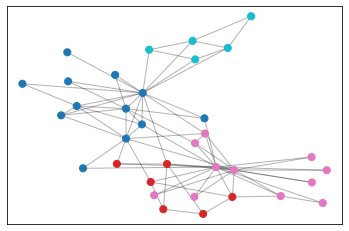

In [11]:
# Draw the network and highlight the communities with colours to study their meaning

import matplotlib.cm as cm       # loads colour map methods
import matplotlib.pyplot as plt

# load the karate club graph - friendship network in a karate fighting club in the USA
# this is just a classic example of social network used to test community detection algorithms
G = nx.karate_club_graph()

# compute the best partition
partition = lc.best_partition(G)

# generate the position of the nodes using the spring layout
# the seed of the random number generator is fixed, thus, every time, the algorithm finds the same positions
pos = nx.spring_layout(G, seed = 1)

# color the nodes according to their partition

# first, create a colour map (i.e. associate a colour to each value), where each partition will get a different colour
# For more on colour maps, see: https://matplotlib.org/stable/tutorials/colors/colormaps.html
cmap = cm.get_cmap('tab10', max(partition.values()) + 1)

# second, draw the network nodes
# -> partition.keys() -> gives the ID of the nodes
# -> partition.values() -> gives the community of the node, as detected above. Each community will have a different colour following the map defined above
nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=50, cmap=cmap, node_color=list(partition.values()))

# third, draw the network edges - alpha gives the opacity of the drawing
nx.draw_networkx_edges(G, pos, alpha = 0.3)                                                                    

# draw using the same method from earlier labs
#nx.draw(G, pos, with_labels = False, node_size=50, cmap=cmap, node_color=list(partition.values()))

plt.show()


<h4><b>2.2</b> Communities at different resolution levels</h4>

Partition of the network into communities using different resolutions or levels. The higher the level, the larger the communities.


In [57]:
# Partition of the network into communities using different resolutions or levels
# Level 0: first partition contains the smallest communities (in the lecture, I called this level 1)
# Level "len(dendrogram) - 1" contains the best partition - i.e. with highest modularity
# therefore, the higher the level, the larger the communities

# Generate a network
#G = nx.erdos_renyi_graph(100, 0.01)
G = nx.karate_club_graph()

# Generate a dendrogram
dendo = lc.generate_dendrogram(G)

# Show the information of the partition for each resolution

for level in range( len(dendo) ):
    
    # number of communities at the current level: 
    # - split the network into communities at "level" -> lc.partition_at_level(dendo, level)
    # - extract the community of each node -> lc.partition_at_level(dendo, level).values() 
    # - get the set of all communities in this partition and the set length -> len(set(...))    
    num_comm = len(set( lc.partition_at_level(dendo, level).values() ))
    
    # calculate the modularity of the partition at the current level    
    modularity_at_level = lc.modularity( lc.partition_at_level(dendo, level), G )
    
    # print the current level, the size and the modularity of the partition at the current level
    print('Partition at level %d has %d communities and modularity Q=%.3f'  % (level+1, num_comm, modularity_at_level) )
    
    # print the partition -node ID and the associated community- at the current level
    print('The partition is: ', lc.partition_at_level(dendo, level), '\n')
    

Partition at level 1 has 8 communities and modularity Q=0.350
The partition is:  {0: 3, 1: 3, 2: 3, 3: 3, 4: 4, 5: 1, 6: 1, 7: 3, 8: 0, 9: 0, 10: 4, 11: 3, 12: 3, 13: 3, 14: 0, 15: 0, 16: 1, 17: 3, 18: 0, 19: 3, 20: 0, 21: 3, 22: 0, 23: 2, 24: 5, 25: 2, 26: 6, 27: 5, 28: 7, 29: 6, 30: 0, 31: 7, 32: 0, 33: 0} 

Partition at level 2 has 4 communities and modularity Q=0.420
The partition is:  {0: 0, 1: 0, 2: 0, 3: 0, 4: 2, 5: 2, 6: 2, 7: 0, 8: 3, 9: 3, 10: 2, 11: 0, 12: 0, 13: 0, 14: 3, 15: 3, 16: 2, 17: 0, 18: 3, 19: 0, 20: 3, 21: 0, 22: 3, 23: 1, 24: 1, 25: 1, 26: 3, 27: 1, 28: 1, 29: 3, 30: 3, 31: 1, 32: 3, 33: 3} 



Number of partitions at level 1: 8


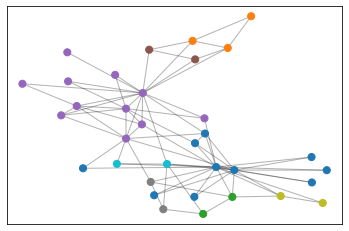

Number of partitions at level 2: 4


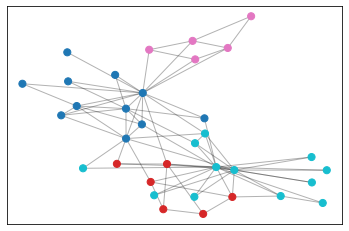

In [58]:
# Draw the network and highlight the communities with colours to study their meaning

import matplotlib.cm as cm       # loads colour map methods
import matplotlib.pyplot as plt

# color the nodes according to the detected partition
# nodes in the same community will have the same colour
for level in range(len(dendo)):
    
    # Create a colour map. Same routine as above, the difference is that now a partition is made for each level
    cmap = cm.get_cmap('tab10', max(list(lc.partition_at_level(dendo, level).values())) + 1)              
    
    # retrieve the position of the nodes using the spring layout
    # the seed of the random number generator is fixed, thus, every time, the algorithm finds the same positions
    pos = nx.spring_layout(G, seed = 1)
    # -> partition.values() -> the community of the node. Each community will have a different colour
    # -> partition.keys() -> the ID of the nodes
    nx.draw_networkx_nodes(G, pos, lc.partition_at_level(dendo, level).keys(), node_size=50, cmap=cmap, node_color=list(lc.partition_at_level(dendo, level).values()) )
    nx.draw_networkx_edges(G, pos, alpha = 0.3)

    # Show the number of partitions at each level
    print('Number of partitions at level %d: %d' %(level+1, len(set(lc.partition_at_level(dendo, level).values())) ) )                                           

    # Draw the network
    plt.show()


<h4><b>2.3</b> Information filtering</h4>

Community detection can be used to reduce the information of networks. This is good to visualise and study large networks since it simplifies the network by looking to links at the community level. The strategy is to generate a new graph GG in which the nodes of GG are the communities detected in G, and the edges of GG are the links between the communities of G.


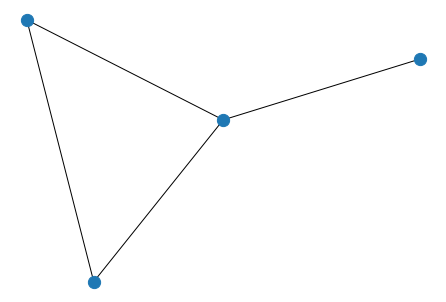

In [46]:
# Generate a new graph GG in which the nodes of GG are the communities from G, and the edges of GG are the links between the communities of G

import matplotlib.pyplot as plt

# load the karate club graph
G = nx.karate_club_graph()

# compute the best partition
partition = lc.best_partition(G)

# generate the "induced-graph", that is, the network whose nodes are the communities (given by "partition") and the unweighted-links are the links between communities.
GG = lc.induced_graph(partition, G)

# draw the new graph GG
# Generate the position of the nodes of GG. Remember: each node here represents a different community
nx.draw(GG, nx.spring_layout(GG, seed=10), node_size = 150)

plt.show()


Number of partitions at level 1: 8


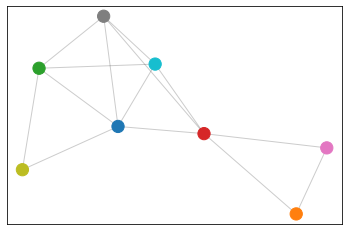

Number of partitions at level 2: 4


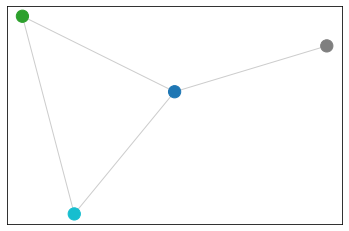

In [59]:
# Draw the network of communities for each level/resolution
# Here, each community is a node

import matplotlib.cm as cm       # loads the colour map

for level in range(len(dendo)):
    
    # Find the number of partitions at this level
    num_part = len(set(lc.partition_at_level(dendo, level).values()))
    
    # Create a colour map. Same routine as above
    cmap = cm.get_cmap('tab10', num_part + 1)  
    
    # This is the only different step than before, i.e. to generate a new network
    # Generate a new network GG where each node corresponds to one community of the original network G at this level
    GG = lc.induced_graph(lc.partition_at_level(dendo, level), G)
    
    # Generate the position of the nodes using the spring layout
    pos = nx.spring_layout(GG, seed=10)

    # Draw the nodes of GG ---> partition.keys() -> the ID of the nodes
    nx.draw_networkx_nodes(GG, pos, range(num_part), node_size=150, cmap=cmap, node_color=range(num_part) )
    
    # Draw the edges of GG
    nx.draw_networkx_edges(GG, pos, alpha = 0.2)

    # Show the number of partitions at each level
    print('Number of partitions at level %d: %d' %(level+1, len(set(lc.partition_at_level(dendo, level).values())) ) )                              

    plt.show()
    

<h3><b>3.</b> Get your hands dirty</h3>

This first exercise is a comparative analysis of the network community structure for different empirical networks.

<ul>
    <li> Go to: https://users.ugent.be/~lcorread/courses/UFU/</li>
    <li> Download the network data sets below </li>
    <ul>
        <li>1) Actor</li>
        <li>2) Collaboration</li>
        <li>3) Internet</li>
        <li>4) Power Grid</li>
        <li>5) Phone Calls</li>
        <li>6) Citation</li>
        <li>7) Email</li>
        <li>8) WWW</li>
    </ul>
    <li> Ps: Nodes are labelled from 0 continuously. Each line contains two node labels A and B, representing either a directed link A->B or an undirected link A-B. Undirected links appear once in the file.</li>
    <li> See more details about these networks in the lab week 2 </li>
</ul>

<h4>Proposed analysis</h4>

<ul>
    <li> Select 3 to 5 networks</li>
    <li> For each network, calculate:</li>
    <ul>
        <li> the number of partitions, i.e. the number of communities $n_c$</li>
        <li> the modularity $Q$</li>
        <li> explain the results comparatively</li>
        <ul>
            <li> Are the modularity values $Q$ the same/similar for all networks? Why? </li>
            <li> What is the meaning of these results for each network? What is the meaning of having low/high modularity in each case?</li>
        </ul>
    </ul>
    <li> Choose one of the networks, what are the partitions (number of communities $n_c^l$) at each level $l$?</li>
    <li> How many levels $l_{max}$ exist for the different networks?</li>
    <li> Generate and draw a new network where each node represents a community of the original network, for a few levels. </li>
    <ul>
        <li> How does the best partition compare with the worst partition, i.e. the partition at the lowest level ($l=1$).</li>
        <li> Compare the networks visually and using the values of the modularity </li>
        <li> What does it mean? </li>
    </ul>
    <li> (homework) Advanced analysis</li>
    <ul>
        <li> What is the distribution of community sizes? Power-law or exponential?</li>
        <li> What does it mean? What are the consequences of such distribution? Think about dynamics processes such as complex contagion and infection processes on networks with one or another distribution of community size.</li>
    </ul>
</ul>


In [12]:
# There is no specific solution for this exercise.
# Just combine the codes above and codes from previous labs (to load the network)

# Note that the calculations might take much time depending on the size and density of the network.
# Therefore, try first with the smallest networks.


<h3><b>4.</b> Get your hands dirty for the last time in this course</h3>

This is a more advanced task, but very useful on research and business applications. The goal is to detect the community structure of a given network and measure the prevalence of attributes or features of the nodes on each network community. The goal is to analyse whether the community structure captures or reflects some clustering of the real data. 

For example, what is the prevalence of men vs women in a given community? are men, for example, overly represented in a given community? or what is the prevalence of students of one or another ethnicity in a given community? Remember the visual network of friendship between high-school students in the USA that we have seen sometimes in the course? What is the impact of these findings for opinion/norms? What is the prevalence of industrial sectors in certain communities? What is the impact for business?

Using a machine learning terminology, network community detection is an unsupervised clustering technique. That is, without knowing the labels of the nodes, one can identify clusters (i.e. communities) where data points (i.e. nodes) are more similar among themselves compared to data points from different clusters (i.e. nodes within communities are more connected between themselves compared to nodes in different communities). In community detection, one exploits the connectivity between nodes, instead of node attributes/features in the feature space, to cluster nodes.

In this exercise, the aim is to detect such clusters and then find out whether they are meaningful.

<h4>Attributes of network communities</h4>

<ul>
    <li>Download the data about sex-workers (week6_sex_workers_partial.csv), see: https://users.ugent.be/~lcorread/courses/UFU/ </li>
    <li>Use the Louvain method </li>
    <li>Analysis </li>
    <ul>
        <li>Detect the best partition </li>
        <li>Calculate the network modularity </li>
        <ul>
            <li> How does it compare with the previous networks? What does it mean? </li>
            <li> (homework) What is the distribution of community sizes? Power-law? </li>
        </ul>
        <li>Hypothesis: A network community reflects that people in the same city have more contacts than people at different cities. </li>
        <ul>
            <li>For each partition/community, calculate the fraction of workers belonging to each city in the data, e.g. in community $A$ $65\%$ of the workers are from Sao Paulo, $10\%$ from Rio, etc...; in community $B$ ... </li>
            <li> (tip) Study the top 5 (or top 10) communities first </li>
            <li> Explain the results </li>
        </ul>
    </ul>
    <li> What is the relation between network communities and cities in this data set? </li>
    <ul>
        <li> Is there one network community for each city? or each network community has different cities? </li>
        <li> Do you find any other trends on the distribution of cities among communites? </li>
    </ul>
    <li> The prevalence of the other variables (node attributes in the data set) can be also calculated for each community </li>
    <ul>
        <li> Can you find communities with higher or lower prevalence of specific traits/atributes? </li>
        <li> Any other particular trends related to community structure? </li>
    </ul>
</ul>
